In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

filling null values

In [5]:
df['Postal Code'].fillna(0, inplace= True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_11064\3066719304.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace= True)


In [6]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
if df.duplicated().sum()> 0:
    print("Duplicates exists.")
else:
    print("No duplicates")

No duplicates


In [9]:
types_of_customers =  df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [10]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(
    columns={'Segment': 'Type of Customers'})

In [11]:
print(number_of_customers)

  Type of Customers  count
0          Consumer   5101
1         Corporate   2953
2       Home Office   1746


([<matplotlib.patches.Wedge at 0x25e973d3350>,
 [Text(-0.07082912490696024, 1.0977172837597642, 'Consumer'),
  Text(-0.5228074564626142, -0.9678183525161589, 'Corporate'),
  Text(0.9321462195039758, -0.5840406025820858, 'Home Office')],
 [Text(-0.03863406813106921, 0.5987548820507803, '52.1%'),
  Text(-0.28516770352506227, -0.5279009195542684, '30.1%'),
  Text(0.508443392456714, -0.3185676014084104, '17.8%')])

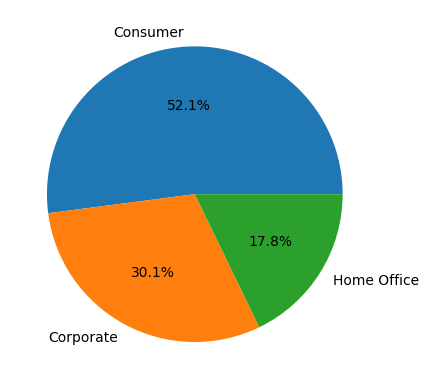

In [12]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customers'], autopct='%1.1f%%')

In [13]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Type of Customer','Sales' : 'Total Sales'})
print(sales_per_segment)

  Type of Customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


<BarContainer object of 3 artists>

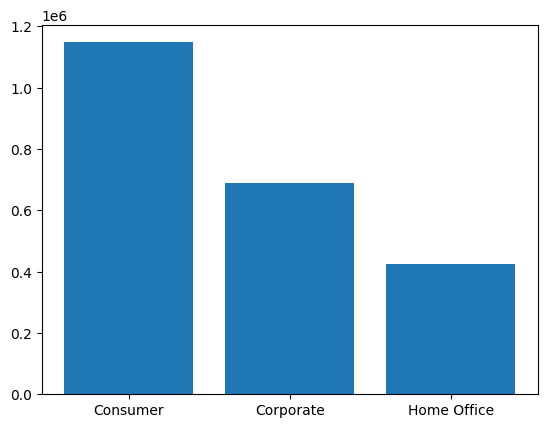

In [14]:
plt.bar(sales_per_segment['Type of Customer'],sales_per_segment['Total Sales'])

([<matplotlib.patches.Wedge at 0x25e99675010>,
 [Text(-0.026420901678353936, 1.099682652384088, 'Consumer'),
  Text(-0.5902004249314666, -0.9282582929393717, 'Corporate'),
  Text(0.9138143750681164, -0.6123261287246105, 'Home Office')],
 [Text(-0.01441140091546578, 0.5998269013004115, '50.8%'),
  Text(-0.32192750450807267, -0.5063227052396572, '30.4%'),
  Text(0.49844420458260885, -0.3339960702134238, '18.8%')])

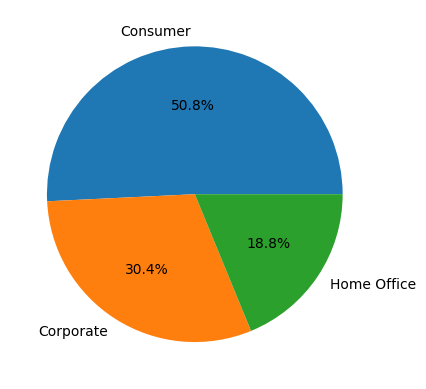

In [15]:
plt.pie(sales_per_segment['Total Sales'],labels=sales_per_segment['Type of Customer'],autopct='%1.1f%%') 

loyal customers

In [16]:
customer_order_frequency =  df.groupby(['Customer ID','Customer Name', 'Segment'])['Order ID'].count().reset_index()

In [17]:
customer_order_frequency.rename(columns={'Order ID':'Total Orders'}, inplace= True)

In [18]:
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >=1]

In [19]:
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

In [20]:
print(repeat_customers_sorted.reset_index(drop=True).head(12))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     SV-20365          Seth Vernon     Consumer            32
5     JD-15895     Jonathan Doherty    Corporate            32
6     CK-12205  Chloris Kastensmidt     Consumer            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    BM-11650           Brian Moss    Corporate            29


Top spenders

In [21]:
customer_sales = df.groupby(['Customer ID','Customer Name', 'Segment'])['Sales'].sum().reset_index()

In [22]:
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

In [23]:
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


Shippin Method

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [25]:
types_of_ship_mode =  df['Ship Mode'].unique()
print(types_of_ship_mode)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [26]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(
    columns={'Ship Mode': 'Type of Ship Mode','count':'Frequency'})

In [27]:
print(shipping_model)

  Type of Ship Mode  Frequency
0    Standard Class       5859
1      Second Class       1902
2       First Class       1501
3          Same Day        538


([<matplotlib.patches.Wedge at 0x25e9972f010>,
 [Text(-0.33286822443706726, 1.0484267953272248, 'Standard Class'),
  Text(-0.37327504859675137, -1.034729789894489, 'Second Class'),
  Text(0.7455147818297655, -0.8088310763523601, 'First Class'),
  Text(1.083680824088883, -0.18877465799741078, 'Same Day')],
 [Text(-0.18156448605658213, 0.5718691610875771, '59.8%'),
  Text(-0.20360457196186435, -0.5643980672151757, '19.4%'),
  Text(0.4066444264525993, -0.44118058710128727, '15.3%'),
  Text(0.5910986313212089, -0.10296799527131496, '5.5%')])

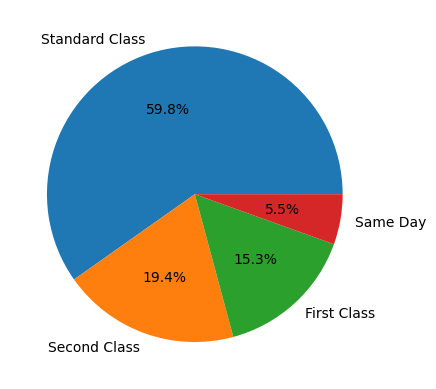

In [28]:
plt.pie(shipping_model['Frequency'],labels=shipping_model['Type of Ship Mode'], autopct='%1.1f%%')

Orders from States

In [29]:
state = df['State'].value_counts().reset_index()
state = state.rename(
    columns={'count':'Order Count'})
print(state)


                   State  Order Count
0             California         1946
1               New York         1097
2                  Texas          973
3           Pennsylvania          582
4             Washington          504
5               Illinois          483
6                   Ohio          454
7                Florida          373
8               Michigan          253
9         North Carolina          247
10              Virginia          224
11               Arizona          223
12             Tennessee          183
13              Colorado          179
14               Georgia          177
15              Kentucky          137
16               Indiana          135
17         Massachusetts          135
18                Oregon          122
19            New Jersey          122
20              Maryland          105
21             Wisconsin          105
22              Delaware           93
23             Minnesota           89
24           Connecticut           82
25          

orders from cities

In [30]:
city = df['City'].value_counts().reset_index()
city = city.rename(
    columns={'count':'Order Count'})
print(city)


              City  Order Count
0    New York City          891
1      Los Angeles          728
2     Philadelphia          532
3    San Francisco          500
4          Seattle          426
..             ...          ...
524      Goldsboro            1
525     Montebello            1
526        Abilene            1
527         Normal            1
528     Springdale            1

[529 rows x 2 columns]


Sales of states

In [31]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
top_state_sales = state_sales.sort_values(by='Sales', ascending=False)
print(top_state_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


Sales of cities

In [32]:
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)
print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


Products 

In [33]:
types_of_products =  df['Category'].unique()
print(types_of_products)

['Furniture' 'Office Supplies' 'Technology']


In [34]:
category = df['Category'].value_counts().reset_index()
category = category.rename(
    columns={'count':'Order Count'})
print(category)


          Category  Order Count
0  Office Supplies         5909
1        Furniture         2078
2       Technology         1813


In [35]:
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
top_category_sales = category_sales.sort_values(by='Sales', ascending=False)
print(top_category_sales.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


([<matplotlib.patches.Wedge at 0x25e9978e890>,
 [Text(0.44988564266575465, 1.0037942560720405, 'Technology'),
  Text(-1.0842320951134052, -0.18558222955335987, 'Furniture'),
  Text(0.6127885417845869, -0.9135043530588783, 'Office Supplies')],
 [Text(0.24539216872677524, 0.5475241396756584, '36.6%'),
  Text(-0.5913993246073119, -0.101226670665469, '32.2%'),
  Text(0.33424829551886553, -0.49827510166847905, '31.2%')])

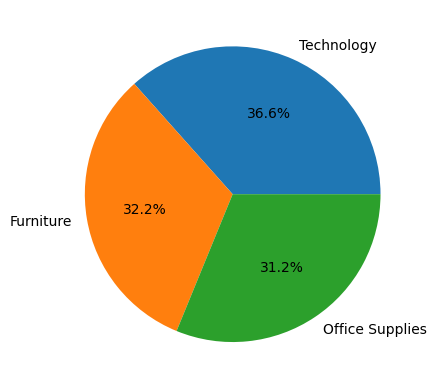

In [36]:
plt.pie(top_category_sales['Sales'],labels=top_category_sales['Category'],autopct='%1.1f%%')

Product sub category

In [37]:
types_of_sub_categopry =  df['Sub-Category'].unique()
print(types_of_sub_categopry)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [38]:
sub_category = df['Sub-Category'].value_counts().reset_index()
sub_category = sub_category.rename({'count':'Order Count'})
print(sub_category)

   Sub-Category  count
0       Binders   1492
1         Paper   1338
2   Furnishings    931
3        Phones    876
4       Storage    832
5           Art    785
6   Accessories    756
7        Chairs    607
8    Appliances    459
9        Labels    357
10       Tables    314
11    Envelopes    248
12    Bookcases    226
13    Fasteners    214
14     Supplies    184
15     Machines    115
16      Copiers     66


In [39]:
sub_category_sales = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
sub_category_sales = sub_category_sales.sort_values(
    by='Sales', ascending=False)
print(sub_category_sales.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


<BarContainer object of 17 artists>

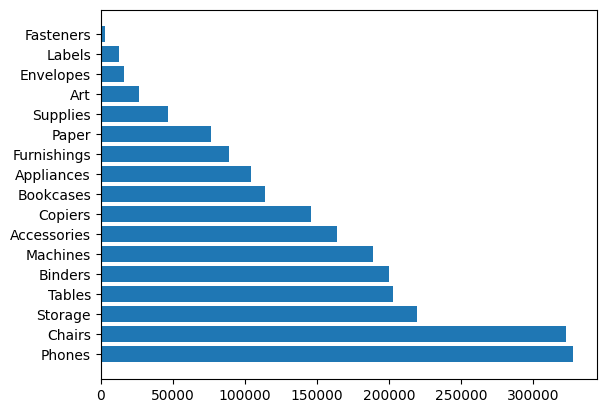

In [40]:
plt.barh(sub_category_sales['Sub-Category'],sub_category_sales['Sales'])

In [41]:
sub_category_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
sub_category_count = sub_category_count.sort_values(by='Sub-Category', ascending=False)
print(sub_category_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [42]:
sub_category_count_sales = df.groupby(
    ['Category', 'Sub-Category'])['Sales'].sum().reset_index()
sub_category_count_sales = sub_category_count_sales.sort_values(
    by='Sales', ascending=False)
print(sub_category_count_sales.reset_index(drop=True))

           Category Sub-Category        Sales
0        Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
2   Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
4   Office Supplies      Binders  200028.7850
5        Technology     Machines  189238.6310
6        Technology  Accessories  164186.7000
7        Technology      Copiers  146248.0940
8         Furniture    Bookcases  113813.1987
9   Office Supplies   Appliances  104618.4030
10        Furniture  Furnishings   89212.0180
11  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
13  Office Supplies          Art   26705.4100
14  Office Supplies    Envelopes   16128.0460
15  Office Supplies       Labels   12347.7260
16  Office Supplies    Fasteners    3001.9600


sales of months

In [43]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


<BarContainer object of 4 artists>

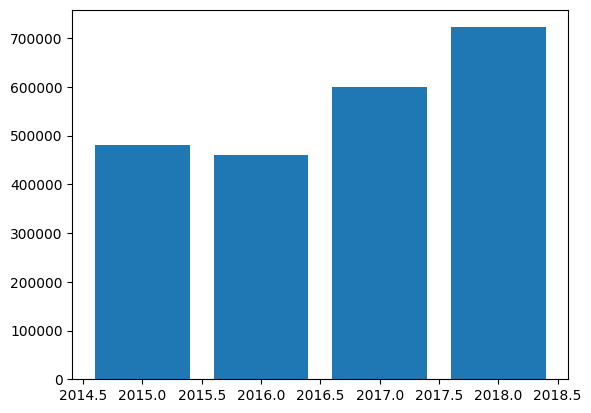

In [44]:
plt.bar(yearly_sales['Year'],yearly_sales['Total Sales'])

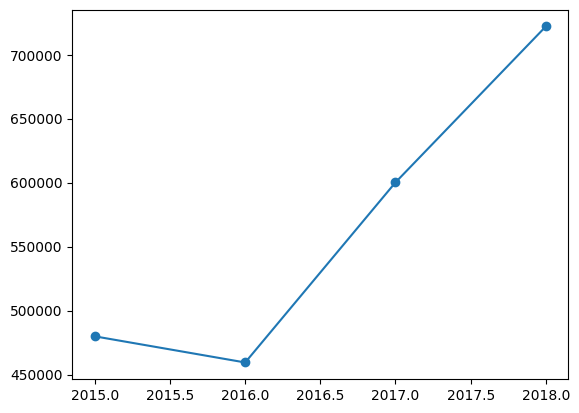

In [45]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'],
         marker='o', linestyle='-')

In [ ]:
df.info()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df[df['Order Date'].dt.year == 2018]
quaterly_sales = yearly_sales.resample('QE', on='Order Date')['Sales'].sum().reset_index()
quaterly_sales = quaterly_sales.rename(columns={'Order Date':'Quater', 'Sales':'Total Sales'})
print(quaterly_sales)

In [ ]:
plt.plot(quaterly_sales['Quater'],quaterly_sales['Total Sales'],marker='o',linestyle='--')
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df[df['Order Date'].dt.year == 2018]
monthly_sales = yearly_sales.resample('ME', on='Order Date')['Sales'].sum().reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Monthly', 'Sales':'Total Sales'})
print(monthly_sales)

In [ ]:
plt.plot(monthly_sales['Monthly'],monthly_sales['Total Sales'],marker='o',linestyle='dotted')
plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

In [ ]:
region_count_sales = df.groupby(
    ['Country', 'Region'])['Sales'].sum().reset_index()
region_count_sales = region_count_sales.sort_values(
    by='Sales', ascending=False)
print(region_count_sales.reset_index(drop=True))

In [ ]:
plt.pie(region_count_sales['Sales'], labels=region_count_sales['Region'], autopct='%1.1f%%')
plt.show()

In [ ]:
df.info()